In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

In [2]:
def get_DLPFC_annotations(section_id):
    input_dir = os.path.join('dataset/DLPFC', section_id)
    adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
    Ann_df = pd.read_csv(os.path.join('dataset/DLPFC', section_id,'metadata.tsv'), sep='\t')
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'layer_guess']
    print(adata)
    return adata

In [3]:
# DLPFC
s = '151507'
adata = get_DLPFC_annotations(s)
cluster = np.loadtxt("result/DLPFC/"+s+"/lambdaI0.8/2500__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['cluster'] = cluster
temp = adata[~adata.obs['Ground Truth'].isnull()]
temp
print("ARI: ",np.round(adjusted_rand_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))
print("NMI: ",np.round(normalized_mutual_info_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
ARI:  0.598
NMI:  0.693


In [4]:
# ME
adata = sc.read_h5ad('dataset/ME/E13.5_E1S3.MOSTA.h5ad')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 84811 × 27841
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - 1810024B03Rik', 'Regulon - 2010315B03Rik', 'Regulon - A1cf', 'Regulon - AW146154', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Ar', 'Regulon - Arid3a', 'Regulon - Arnt', 'Regulon - Arx', 'Regulon - Atf1', 'Regulon - Atf2', 'Regulon - Atf4', 'Regulon - Bach1', 'Regulon - Bad', 'Regulon - Barhl1', 'Regulon - Barhl2', 'Regulon - Barx1', 'Regulon - Batf', 'Regulon - Batf3', 'Regulon - Bcl6b', 'Regulon - Bclaf1', 'Regulon - Bhlhe40', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Borcs8', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cbfb', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpd', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Clock', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l

In [5]:
cluster = np.loadtxt("result/ME/lambdaI0.8/7500__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['cluster'] = cluster

In [6]:
print("ARI: ",np.round(adjusted_rand_score(adata.obs['cluster'],adata.obs['annotation']),3))
print("NMI: ",np.round(normalized_mutual_info_score(adata.obs['cluster'],adata.obs['annotation']),3))

ARI:  0.33
NMI:  0.59


In [7]:
# MH
import anndata as ad
counts_file = 'dataset/MH/Puck_190921_21.digital_expression.txt'
coor_file = 'dataset/MH/Puck_190921_21_bead_locations.csv'
adata = sc.read_text(counts_file, delimiter='\t')
coor_df = pd.read_csv(coor_file, index_col=0)
adata = ad.AnnData(adata.X.T, var =adata.obs ,obs=adata.var)
adata.var_names_make_unique()
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata

AnnData object with n_obs × n_vars = 20143 × 19653

In [8]:
adata.obsm["spatial"] = coor_df.to_numpy()
stDGCC = np.loadtxt("result/MH/lambdaI0.2/14000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)

<AxesSubplot:title={'center':' '}, xlabel='spatial1', ylabel='spatial2'>

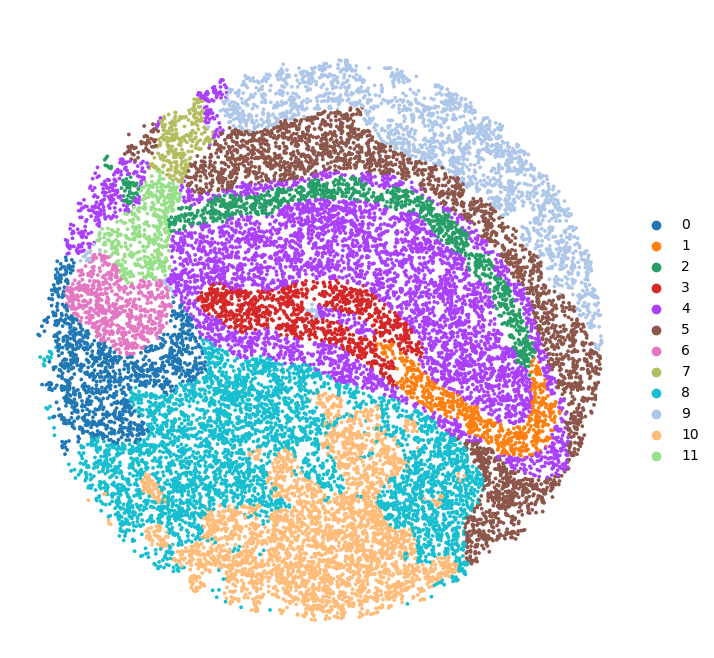

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
dic = {'0':'5',
      '1':'0',
       '2':'7',
       '3':'8',
       '4':'4',
       '5':'9',
       '6':'6',
       '7':'3',
       '8':'10',
       '9':'2',
       '10':'11',
       '11':'1'
      }
for i in range(stDGCC.shape[0]):
    stDGCC[i] = dic[stDGCC[i]]
adata.obs['stDGCC'] = stDGCC
sc.pl.embedding(adata[((adata.obsm['spatial'][:,0]-3200)**2 + (adata.obsm['spatial'][:,1]-3100)**2 < 2500**2)], 
                basis="spatial", color="stDGCC",s=30, show=False, title=' ' ,frameon=False,colorbar_loc= None
               )
#                save = 'stDGCC.png')